After some difficulty modelling, I made a simplified model that just looks into the control hemoglobin data. This will solve for a couple parameters to simplify the system.

 final_simplex: (array([[1.38476998e-05, 6.86142089e+00],
       [1.38475849e-05, 6.86133328e+00],
       [1.38477791e-05, 6.86135160e+00]]), array([5.55120247e-11, 5.55120253e-11, 5.55120255e-11]))
           fun: 5.551202471600931e-11
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 40
        status: 0
       success: True
             x: array([1.38476998e-05, 6.86142089e+00])


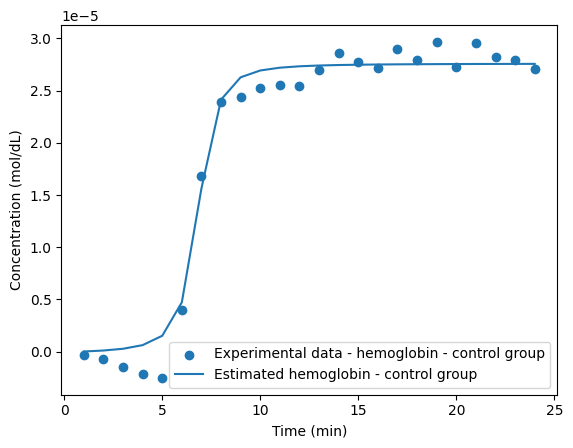

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')
#print(data.head())

time = np.linspace(1, 24, 24)
ic = 0
ac = (10E-6, 5)

def func(self, x, s, mu):
    dC = s/((((x-mu)**2)+1)**(3/2))
    return dC

def err(params):
    s, mu = params
    ODEoutput = odeint(func, ic, time, args = (s, mu))
    errC = (ODEoutput[:,0] - data["cadj mol/dL"])**2
    return np.sum(errC)

bounds = ([0, 1E100], [0, 1E100])
sol = minimize(err, x0 = ac, bounds = bounds, method = "Nelder-Mead")
print(sol)

fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1]))
plt.scatter(data["time"], data['cadj mol/dL'], label = "Experimental data - hemoglobin - control group")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin - control group")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend()